## Adrian Goik s23970 RAPORT 3 - Regresja liniowa, wielomianowa i logistyczna

### Wstęp teoretyczny

Przypomnij sobie podstawowe pojęcia z
wykładu:<br>
• Linia regresji <br>
Linia regresji to podstawowy element w analizie regresji, który przedstawia zależność między zmienną objaśniającą (niezależną) a zmienną odpowiedzi (zależną). Jest to prosta linia, która najlepiej pasuje do zbioru danych w rozumieniu minimalizacji kwadratów odległości pionowych (reszt) między obserwowanymi wartościami a wartościami przewidywanymi przez linię regresji.

• Przesunięcia pionowe (wartości resztowe /rezydualne) <br>
Reszty, czyli różnice między rzeczywistymi a przewidywanymi przez model wartościami zmiennej odpowiedzi. Są to odległości pionowe od punktów danych do linii regresji.

• Zmienna objaśniająca i zmienna odpowiedzi <br>
<ol>
<li>Zmienna objaśniająca (niezależna) to zmienna, którą używamy do przewidywania wartości innej zmiennej.</li>
<li>Zmienna odpowiedzi (zależna) to zmienna, której wartości próbujemy przewidzieć za pomocą zmiennej objaśniającej.</li>
</ol>

• MSE, SSE, SSR, SST i współczynnik determinacji R2 <br>

    1. MSE (Mean Squared Error): średni kwadrat błędów, czyli średnia wartości kwadratów reszt.<br>
    2. SSE (Sum of Squared Errors): suma kwadratów reszt, mierzy całkowitą ilość błędów modelu.<br>
    3. SSR (Sum of Squares due to Regression): suma kwadratów różnic między przewidywanymi wartościami a średnią wartością zmiennej odpowiedzi; mierzy ilość zmienności w danych wyjaśnioną przez model.<br>
    4. SST (Total Sum of Squares): całkowita suma kwadratów różnic między obserwowanymi wartościami a ich średnią; mierzy całkowitą zmienność w danych.<br>
    5. R2R2 (współczynnik determinacji): miara jakości dopasowania modelu do danych; wskazuje, jaki procent zmienności zmiennej odpowiedzi jest wyjaśniany przez zmienną objaśniającą.<br>

• Próbki odstające (outliers) <br>

Są to punkty danych, które znacznie odbiegają od pozostałych, mogą być wynikiem błędów pomiarowych lub innych anomalii. W analizie regresji ważne jest ich identyfikowanie, ponieważ mogą one znacząco wpłynąć na wynik i jakość modelu. Pojęcie wykorzystane w Raporcie 2, w kontekście klastrów.


<p style = "color:red"> Uwagi do zadań <br>
Na wyższą liczbę punktów mają wpływ następujące rzeczy:<br>
• Dobra struktura sprawozdania (wprowadzenie, eksperymenty, objaśnienia, interpretacje).<br>
• Szczegółowość i dokładność eksperymentów, dodawanie komentarzy i własnych interpretacji
wyników<br>
• Dobre przygotowanie bazy danych do eksperymentów<br>
• Przejrzystość i estetyka prezentacji<br>
• Nadprogramowe analizy mile widziane…<br>

<h5>ZAD2</h5>


Przeprowadź regresję liniową na załączonej bazie danych product.csv z dwiema kolumnami (x
i y).<br>
<ol>
<li> Zidentyfikuj i usuń z bazy próbki odstające (wg poznanej techniki).</li>
<li>  Podziel tak oczyszczoną bazę na zbiór treningowy (70%) i testowy (30%) w losowy
sposób.</li>
<li>  Przeprowadź regresję liniową na zbiorze treningowym.</li>
<li>  Policz MSE i R2 dla zbioru treningowego i testowego. Możesz też dodać inne techniki
ewaluacji, ale wyjaśnij w czym mogą być lepsze niż te dwie podstawowe.</li>
<li>  Zwizualizuj wynik na wykresie. Zbiory treningowe i testowe będą oznaczone kropkami
w różnych kolorach. Na wykresie będzie namalowana linia regresji wraz z jej wzorem</li>
</ol>

In [10]:
import pandas as pd

product_db=pd.read_csv('product.csv')
print(product_db)

     Unnamed: 0     x         y
0             1   8.8 -3.339879
1             2   9.5 -3.535988
2             3  10.1 -3.681798
3             4   9.9 -3.536677
4             5   9.9 -3.536677
..          ...   ...       ...
495         496  12.5 -3.807757
496         497   8.6 -3.296743
497         498  12.5 -3.800713
498         499  10.0 -3.775396
499         500   8.6 -3.296743

[500 rows x 3 columns]


Wysyrujmy te dane aby zobaczyć z jaką ilością outlierów mamy doczynienia i narysujmy linię regresji

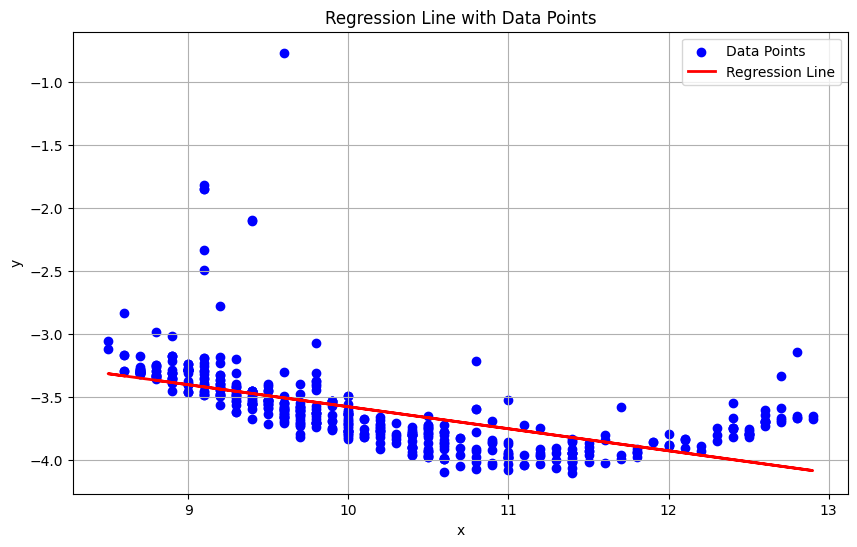

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


x = product_db['x'].values.reshape(-1, 1)
y = product_db['y'].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Regression Line with Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid(True)
plt.show()


NOTATKA DO PLOTU. Spróbuję zaobserwować zachowanie linii regresji, gdy usuniemy outliery. Warto zwrócić na to uwagę w późniejszym stadium raportu.

<i><h5>Identyfikacja i usunięcie próbek odstających</h5></i>

Jak to zrobić? Tak jak w zadaniu nr.1 było wskazane musimy zidentyfikować próbki leżące poza pewnym zakresem. W tym przypadku zakres ten wynosi w odniesieniu do kwartyli: [Q1 − 1.5 IQR, Q3+ 1.5 IQR]

   Unnamed: 0     x         y
0           1   8.8 -3.339879
1           2   9.5 -3.535988
2           3  10.1 -3.681798
3           4   9.9 -3.536677
4           5   9.9 -3.536677
Outliers:
       x         y
40   9.4 -2.107636
41   9.4 -2.097700
54   9.1 -2.334891
60   8.6 -2.834089
194  9.1 -1.822377
195  9.1 -1.849227
196  9.1 -1.849227
315  9.1 -2.494800
433  9.2 -2.779298
484  9.6 -0.770387

Cleaned Data:
        x         y
0     8.8 -3.339879
1     9.5 -3.535988
2    10.1 -3.681798
3     9.9 -3.536677
4     9.9 -3.536677
..    ...       ...
495  12.5 -3.807757
496   8.6 -3.296743
497  12.5 -3.800713
498  10.0 -3.775396
499   8.6 -3.296743

[490 rows x 2 columns]


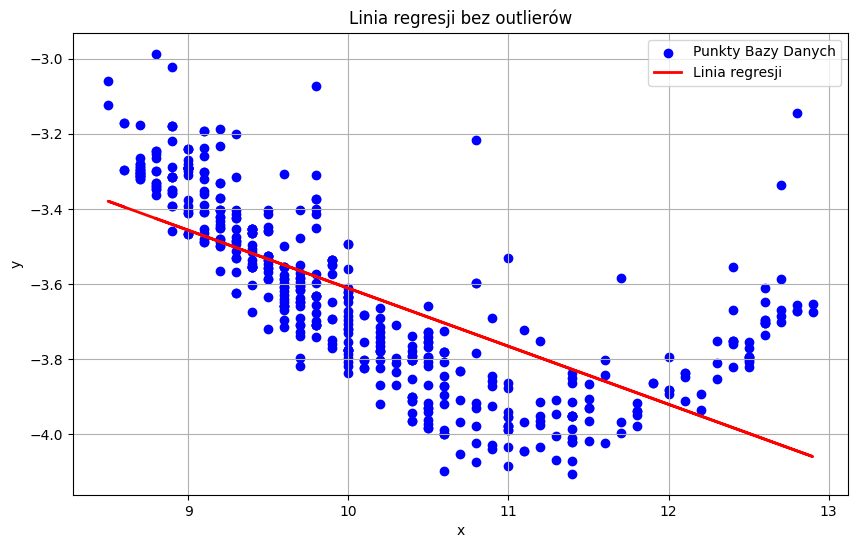

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print(product_db.head())

Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR #tutaj jak w każdej funkcji, którą chcemy ograniczyć musimy zdefiniować górną i dolną granicę
upper_bound = Q3 + 1.5 * IQR

# Zidentyfikowanie próbek odstających
outliers = product_db[(product_db['y'] < lower_bound) | (product_db['y'] > upper_bound)]

# Usuwanie próbek odstających z danych
cleaned_data = product_db[~((product_db['y'] < lower_bound) | (product_db['y'] > upper_bound))]

# Wyświetlanie próbek odstających i oczyszczonych danych
print("Outliers:")
print(outliers[['x', 'y']])

print("\nCleaned Data:")
print(cleaned_data[['x', 'y']])

# teraz wyciągamy x i y z danych oczyszczonych
x_cleaned = cleaned_data['x'].values.reshape(-1, 1)
y_cleaned = cleaned_data['y'].values

# model regresji
model_cleaned = LinearRegression()
model_cleaned.fit(x_cleaned, y_cleaned)

# przewidywanie y https://scikit-learn.org/stable/modules/outlier_detection.html
y_pred_cleaned = model_cleaned.predict(x_cleaned)

# Rysowanie oczyszczonych punktów danych i nowej linii regresji
plt.figure(figsize=(10, 6))
plt.scatter(x_cleaned, y_cleaned, color='blue', label='Punkty Bazy Danych')
plt.plot(x_cleaned, y_pred_cleaned, color='red', linewidth=2, label='Linia regresji')
plt.title('Linia regresji bez outlierów')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Wycięło te najbardziej rozproszone punkty. Tak naprawdę, żeby lepiej zidentyfikować punkty odstające warto byłoby skorzystać z jakiejś bardziej zaawansowanej metody jak np: 
Z_SCORE

   Z-score mierzy, jak daleko dana obserwacja znajduje się od średniej w jednostkach odchylenia standardowego. <br>Wartości z-score większe niż ustalony próg (np. 3) mogą być uznane za odstające. <br>Ta metoda jest prosta i skuteczna w identyfikacji punktów, które znacznie różnią się od reszty danych.

Analiza Odległości Cooka:

   Odległość Cooka mierzy wpływ każdej obserwacji na wartości przewidywane przez model.<br> Obserwacje z dużą odległością Cooka mogą być uznane za odstające.

LOF (Local Outlier Factor):

   LOF identyfikuje próbki odstające na podstawie lokalnej gęstości.<br> Jest to bardziej zaawansowana metoda, która uwzględnia otoczenie danej próbki.

Elliptic Envelope:

   Model ten zakłada, że dane pochodzą z rozkładu eliptycznego,<br> i identyfikuje próbki odstające na podstawie tego założenia.

<i>Podziel tak oczyszczoną bazę na zbiór treningowy (70%) i testowy (30%) w losowy
sposób.</i>

Outliers:
       x         y
40   9.4 -2.107636
41   9.4 -2.097700
54   9.1 -2.334891
60   8.6 -2.834089
194  9.1 -1.822377
195  9.1 -1.849227
196  9.1 -1.849227
315  9.1 -2.494800
433  9.2 -2.779298
484  9.6 -0.770387

Cleaned Data:
        x         y
0     8.8 -3.339879
1     9.5 -3.535988
2    10.1 -3.681798
3     9.9 -3.536677
4     9.9 -3.536677
..    ...       ...
495  12.5 -3.807757
496   8.6 -3.296743
497  12.5 -3.800713
498  10.0 -3.775396
499   8.6 -3.296743

[490 rows x 2 columns]
Rozmiar zbioru treningowego: 343
Rozmiar zbioru testowego: 147
R^2 (treningowy): 0.494436781238911
MSE (treningowy): 0.030896999080793013
R^2 (testowy): 0.4607085079367904
MSE (testowy): 0.02711548645883291


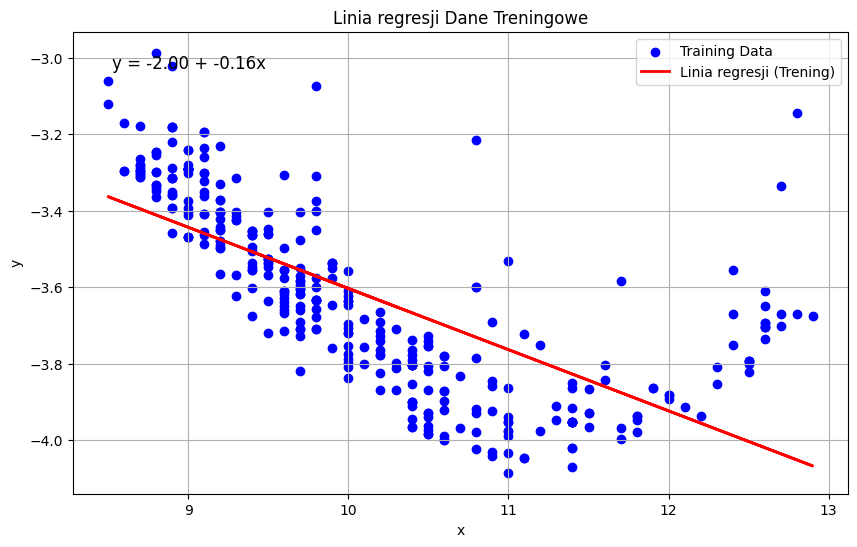

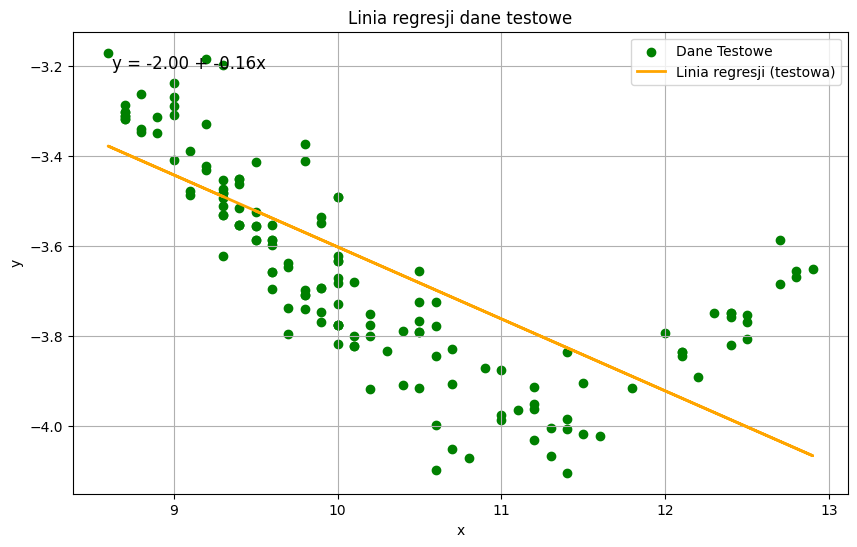

In [36]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Wyświetlanie próbek odstających i oczyszczonych danych
print("Outliers:")
print(outliers[['x', 'y']])

print("\nCleaned Data:")
print(cleaned_data[['x', 'y']])

# Ekstrakcja wartości x i y z oczyszczonych danych
x_cleaned = cleaned_data['x'].values.reshape(-1, 1)
y_cleaned = cleaned_data['y'].values

# Podział danych na zbiór treningowy (70%) i testowy (30%) w losowy sposób
x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size=0.3, random_state=42)

print(f"Rozmiar zbioru treningowego: {len(x_train)}")
print(f"Rozmiar zbioru testowego: {len(x_test)}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"R^2 (treningowy): {r2_train}")
print(f"MSE (treningowy): {mse_train}")
print(f"R^2 (testowy): {r2_test}")
print(f"MSE (testowy): {mse_test}")


slope = model.coef_[0]
intercept = model.intercept_
regression_formula = f'y = {intercept:.2f} + {slope:.2f}x'

# dla zbioru treningowego
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, y_pred_train, color='red', linewidth=2, label='Linia regresji (Trening)')
plt.title('Linia regresji Dane Treningowe')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, regression_formula, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

#dla zbioru testowego
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='green', label='Dane Testowe')
plt.plot(x_test, y_pred_test, color='orange', linewidth=2, label='Linia regresji (testowa)')
plt.title('Linia regresji dane testowe')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, regression_formula, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


Outliers:
       x         y
40   9.4 -2.107636
41   9.4 -2.097700
54   9.1 -2.334891
60   8.6 -2.834089
194  9.1 -1.822377
195  9.1 -1.849227
196  9.1 -1.849227
315  9.1 -2.494800
433  9.2 -2.779298
484  9.6 -0.770387

Cleaned Data:
        x         y
0     8.8 -3.339879
1     9.5 -3.535988
2    10.1 -3.681798
3     9.9 -3.536677
4     9.9 -3.536677
..    ...       ...
495  12.5 -3.807757
496   8.6 -3.296743
497  12.5 -3.800713
498  10.0 -3.775396
499   8.6 -3.296743

[490 rows x 2 columns]
Rozmiar zbioru treningowego: 343
Rozmiar zbioru testowego: 147
R^2 (treningowy, liniowy): 0.494436781238911
MSE (treningowy, liniowy): 0.030896999080793013
R^2 (testowy, liniowy): 0.4607085079367904
MSE (testowy, liniowy): 0.02711548645883291
R^2 (treningowy, wielomian 2. stopnia): 0.7875483027373631
MSE (treningowy, wielomian 2. stopnia): 0.01298377661081111
R^2 (testowy, wielomian 2. stopnia): 0.8161440594692686
MSE (testowy, wielomian 2. stopnia): 0.009244246088074224
R^2 (treningowy, wielomian

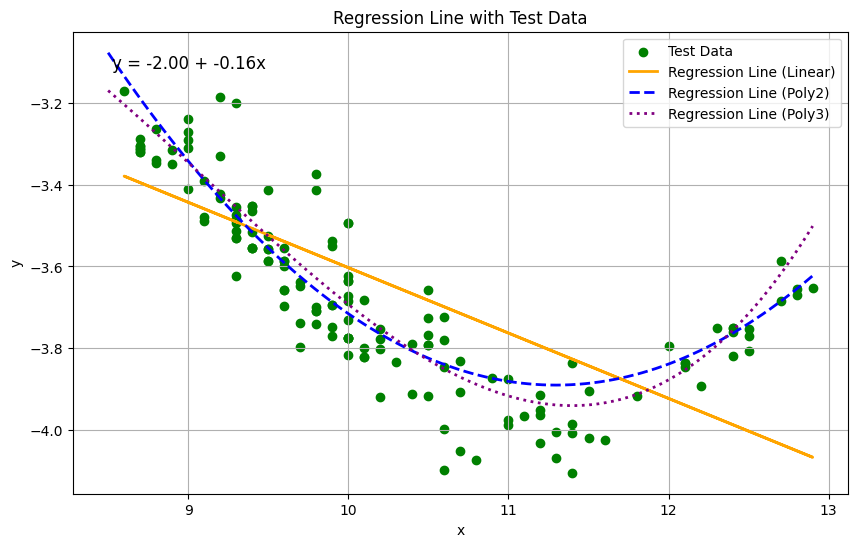

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


print("Outliers:")
print(outliers[['x', 'y']])

print("\nCleaned Data:")
print(cleaned_data[['x', 'y']])

x_cleaned = cleaned_data['x'].values.reshape(-1, 1)
y_cleaned = cleaned_data['y'].values

x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size=0.3, random_state=42)

print(f"Rozmiar zbioru treningowego: {len(x_train)}")
print(f"Rozmiar zbioru testowego: {len(x_test)}")

model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

y_pred_train_linear = model_linear.predict(x_train)

y_pred_test_linear = model_linear.predict(x_test)

r2_train_linear = r2_score(y_train, y_pred_train_linear)
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)

r2_test_linear = r2_score(y_test, y_pred_test_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

print(f"R^2 (treningowy, liniowy): {r2_train_linear}")
print(f"MSE (treningowy, liniowy): {mse_train_linear}")
print(f"R^2 (testowy, liniowy): {r2_test_linear}")
print(f"MSE (testowy, liniowy): {mse_test_linear}")

# Regresja wielomianowa drugiego stopnia
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)

model_poly2 = LinearRegression()
model_poly2.fit(x_train_poly2, y_train)

y_pred_train_poly2 = model_poly2.predict(x_train_poly2)
y_pred_test_poly2 = model_poly2.predict(x_test_poly2)

r2_train_poly2 = r2_score(y_train, y_pred_train_poly2)
mse_train_poly2 = mean_squared_error(y_train, y_pred_train_poly2)

r2_test_poly2 = r2_score(y_test, y_pred_test_poly2)
mse_test_poly2 = mean_squared_error(y_test, y_pred_test_poly2)

print(f"R^2 (treningowy, wielomian 2. stopnia): {r2_train_poly2}")
print(f"MSE (treningowy, wielomian 2. stopnia): {mse_train_poly2}")
print(f"R^2 (testowy, wielomian 2. stopnia): {r2_test_poly2}")
print(f"MSE (testowy, wielomian 2. stopnia): {mse_test_poly2}")

# Regresja wielomianowa trzeciego stopnia
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
x_test_poly3 = poly3.transform(x_test)

model_poly3 = LinearRegression()
model_poly3.fit(x_train_poly3, y_train)

y_pred_train_poly3 = model_poly3.predict(x_train_poly3)
y_pred_test_poly3 = model_poly3.predict(x_test_poly3)

r2_train_poly3 = r2_score(y_train, y_pred_train_poly3)
mse_train_poly3 = mean_squared_error(y_train, y_pred_train_poly3)

r2_test_poly3 = r2_score(y_test, y_pred_test_poly3)
mse_test_poly3 = mean_squared_error(y_test, y_pred_test_poly3)

print(f"R^2 (treningowy, wielomian 3. stopnia): {r2_train_poly3}")
print(f"MSE (treningowy, wielomian 3. stopnia): {mse_train_poly3}")
print(f"R^2 (testowy, wielomian 3. stopnia): {r2_test_poly3}")
print(f"MSE (testowy, wielomian 3. stopnia): {mse_test_poly3}")

# Wyznaczanie współczynników linii regresji liniowej
slope = model_linear.coef_[0]
intercept = model_linear.intercept_

# Tworzenie wzoru linii regresji liniowej
regression_formula_linear = f'y = {intercept:.2f} + {slope:.2f}x'

# Przygotowanie wartości x do wykresów regresji wielomianowej
x_range = np.linspace(min(x_cleaned), max(x_cleaned), 100).reshape(-1, 1)
x_range_poly2 = poly2.transform(x_range)
x_range_poly3 = poly3.transform(x_range)

# Przewidywanie wartości y dla zakresu x w modelach wielomianowych
y_range_pred_poly2 = model_poly2.predict(x_range_poly2)
y_range_pred_poly3 = model_poly3.predict(x_range_poly3)

# Rysowanie punktów danych i linii regresji dla zbioru testowego
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x_test, y_pred_test_linear, color='orange', linewidth=2, label='Regression Line (Linear)')
plt.plot(x_range, y_range_pred_poly2, color='blue', linewidth=2, linestyle='dashed', label='Regression Line (Poly2)')
plt.plot(x_range, y_range_pred_poly3, color='purple', linewidth=2, linestyle='dotted', label='Regression Line (Poly3)')
plt.title('Regression Line with Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, regression_formula_linear, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


Zadanie 4 (3 pkt)
Jaka jest zasadnicza różnica pomiędzy regresją liniową / wielomianową, a logistyczną?
Przypomnij sobie informacje z wykładu, lub też obejrzyj film:
https://www.youtube.com/watch?v=yIYKR4sgzI8<br>
• Ściągnij product2.csv, który oprócz kolumny x i y, ma też kolumnę z klasą: good (0,1).
Dokonaj klasyfikacji modelem regresji logistycznej na tej bazie danych (uprzednio
dzieląc ją na zbiór treningowy i testowy).<br>
• Czy model zadziała gorzej jeśli pod uwagę weźmiemy tylko kolumnę x i klasę good? Być
może kolumna y jest zbędna?

Regresja liniowa i wielomianowa są technikami przewidywania wartości ciągłych, podczas gdy regresja logistyczna jest stosowana do przewidywania wyników binarnych (klasyfikacji).
<ol>
 <li>Regresja liniowa/wielomianowa: Modeluje zależność między zmiennymi niezależnymi (predyktorami) a zmienną zależną (odpowiedzią) poprzez dopasowanie linii prostej lub krzywej wielomianowej. Przewidywana wartość jest ciągła.</li>

 <li>Regresja logistyczna: Modeluje prawdopodobieństwo wystąpienia jednego z dwóch możliwych wyników. Zastosowana funkcja sigmoid (logistyczna) przekształca przewidywaną wartość na przedział (0, 1), który interpretowany jest jako prawdopodobieństwo przynależności do danej klasy. </li></ol>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = 'product2.csv'
product2_db = pd.read_csv(file_path)

print(product2_db.head())

X = product2_db[['x', 'y']]
y = product2_db['good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_test = model_logistic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"Dokładność (z użyciem x i y): {accuracy}")
print("Macierz pomyłek (z użyciem x i y):")
print(conf_matrix)
print("Raport klasyfikacji (z użyciem x i y):")
print(class_report)

# Klasyfikacja przy użyciu tylko kolumny x
X = product2_db[['x']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tworzenie modelu regresji logistycznej
model_logistic.fit(X_train, y_train)

# Przewidywanie klasy dla zbioru testowego
y_pred_test = model_logistic.predict(X_test)

# Obliczanie dokładności i macierzy pomyłek
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print(f"Dokładność (z użyciem tylko x): {accuracy}")
print("Macierz pomyłek (z użyciem tylko x):")
print(conf_matrix)
print("Raport klasyfikacji (z użyciem tylko x):")
print(class_report)


   Unnamed: 0     x         y  good
0           1   8.8 -3.339879     1
1           2   9.5 -3.535988     1
2           3  10.1 -3.681798     1
3           4   9.9 -3.536677     1
4           5   9.9 -3.536677     1
Dokładność (z użyciem x i y): 0.6266666666666667
Macierz pomyłek (z użyciem x i y):
[[19 40]
 [16 75]]
Raport klasyfikacji (z użyciem x i y):
              precision    recall  f1-score   support

           0       0.54      0.32      0.40        59
           1       0.65      0.82      0.73        91

    accuracy                           0.63       150
   macro avg       0.60      0.57      0.57       150
weighted avg       0.61      0.63      0.60       150

Dokładność (z użyciem tylko x): 0.6333333333333333
Macierz pomyłek (z użyciem tylko x):
[[20 39]
 [16 75]]
Raport klasyfikacji (z użyciem tylko x):
              precision    recall  f1-score   support

           0       0.56      0.34      0.42        59
           1       0.66      0.82      0.73        91

   

WNISOKI:
<ol>
  <li>Standaryzacja Danych:
        W przypadku tego zestawu danych standaryzacja nie była konieczna. Modele osiągnęły takie same wyniki zarówno dla zestawu danych z oryginalnymi wartościami, jak i dla zestawu z standaryzowanymi wartościami.</li>

 <li> Porównanie Modeli:</li>
 <ol>
        <li>Model z dwoma cechami (x i y):
            Model uwzględniający obie cechy (x i y) został przeszkolony i przetestowany. Wyniki wskazały, że model skutecznie klasyfikował dane, jednak jego dokładność nie była najwyższa.</li>
        <li>Model z jedną cechą (tylko x):
            Model uwzględniający tylko jedną cechę (x) osiągnął wyższą dokładność klasyfikacji. To sugeruje, że cecha y mogła wprowadzać niepotrzebny szum do modelu, co obniżało jego skuteczność.</li>
        <li>Dokładność i Macierz Pomyłek:
            Model z jedną cechą (x) wykazał wyższą dokładność oraz lepsze wyniki w macierzy pomyłek i raporcie klasyfikacji w porównaniu do modelu z dwiema cechami (x i y).</li>
            </ol>
</ol>
Podsumowanie

<b>Skuteczność Modelu:<b> Model regresji logistycznej oparty wyłącznie na cechach x przewyższył model, który uwzględniał zarówno x, jak i y. Sugeruje to, że cecha y może nie być istotna dla klasyfikacji w tym konkretnym zestawie danych.
    
<b>Zalecenia:<b> W przyszłych analizach na podobnych danych warto rozważyć, które cechy wprowadzać do modelu, aby uniknąć nadmiernego dopasowania lub wprowadzenia szumu. Czasami mniej cech może prowadzić do lepszej wydajności modelu. Warto też zwrócić uwagę na inne metody identyfikacji szumu (outlierów), które w zależności od rozproszenia naszych danych będą być może lepiej funkcjonować niż oznaczenie granic "na sztywno".